Добрый день, Никита!<br>

Задание состоит из трёх частей. Но я решила не решать каждую часть отдельно, объединить все задачи с помощью нескольких функций и вывести на двух графиках результаты моделей с разными параметрами(подходами).

Импортируем все необходимые библиотеки

In [76]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

Сгенерируем данные с помощью библиотеки sklearn

In [78]:
X, y, coef = datasets.make_regression(n_samples=5000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)


Посмотрим на полученные данные. Построим графики распределения и зависимости признаков. Решим нужно ли применять масштабирование к независимым признакам.

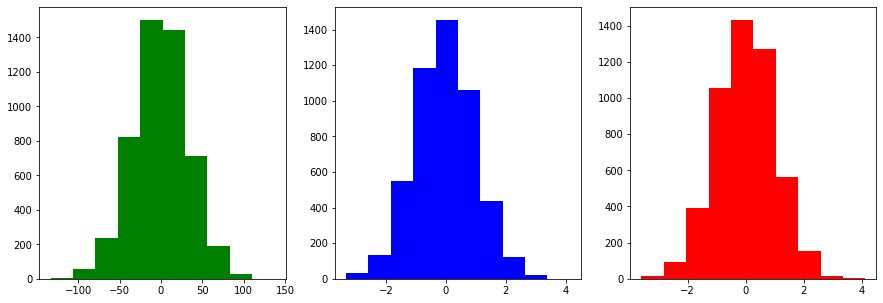

In [79]:
#посмотрим на распределение признаков и зависимой переменной, что получилось
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.hist(y, color = 'g')
ax2.hist(X[:,0], color='b')
ax3.hist(X[:,1], color='r')

plt.show()

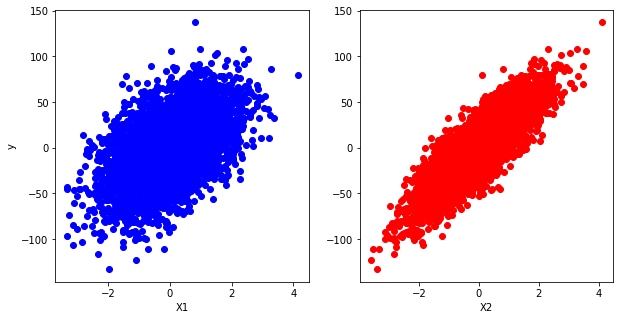

In [80]:
#посмотрим на график зависимости y от X1 и X2
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_xlabel('X1')
ax2.set_xlabel('X2')
ax1.set_ylabel('y')
ax1.scatter(X[:,0], y, color='b')
ax2.scatter(X[:,1], y, color='r')
plt.show()

По графикам видно, что признаки очень похожи между собой по масштабу. Делать масштабирование не будем.<br>
Между y и X[2] связь больше линейная, судя по графику. А вот связь между y и X[1] непонятна. <br>
<font color=red>Никита, можно ли судить по графику о зависимости признака с независимыми об их связи? Или нужно использовать дополнительные методы или расчитывать критерии? Подскажите что почитать.

Приступим к обучению моделей. <br>
Я написала 2 функции weight_calculation и eval_model, чтобы реализовать все возможные варианты оценки параметров модели с помощью Градиентного спуска.

In [ ]:
#нам понадобится функция для расчета ошибки работы модели, взяла функцию для расчета ошибки mse с вебинара
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [82]:
#взяла функцию из вебинара и немного модифицировала ее
#насколько я поняла градиентный спуск и стахостический градиентный спуск отличаются друг от друга
#способом выбора начального вектора весов: градиентный - обычно берут нулевой вектор или очень маленькие веса,
#а для стахостического выбирается один случайный пример и его веса используются для начального вектора
def weight_calculation (X,y,W,alpha,n,regul_flag=0):
  lambda_ = 1e-8
  if regul_flag == 1:
    #реализация для L1-регуляризации
    y_pred = np.dot(W,X.T)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X)) + (lambda_/2) * np.sum(np.abs(W))
  elif regul_flag == 2:
    #реализация для L2-регуляризации
    y_pred = np.dot(W,X.T)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X)) + (lambda_/2) * np.sum(W**2)
  else:
    #без регуляризации
    y_pred = np.dot(W,X.T)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X)))
  return err,W

def eval_model(X, y, W, iterations, qty_in_batch, alpha,regul_flag):
    errors = []
    n = X.T.shape[1]
    if qty_in_batch == 1:
      #обычный градиентный спуск
      for i in range(1, iterations+1):
        err,W = weight_calculation(X,y,W,alpha,n,regul_flag)
        #запись в массив для графика
        errors.append([i,err])
    else:
      #стахостический градиентный спуск
      n_batch = n // qty_in_batch
      if n % qty_in_batch != 0:
          n_batch += 1
      for i in range(1, iterations+1):
        # эпоха обучения
          for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[start_ : end_,:]
            y_tmp = y[start_ : end_]
            err,W = weight_calculation(X_tmp,y_tmp,W,alpha,n,regul_flag)
          #запись в массив для графика
          errors.append([i,err])
    errors = np.array(errors)
    return errors

Обучим модели с разными параметрами.

In [83]:
#обучаем модель с помощью градиентного спуска
#в качестве начального вектора значений выбираем нулевой вектор
#результат записываем в массив, чтобы потом построить график
W = np.zeros(X.shape[1])
errors_gr = eval_sgd_model(X, y, W, 5000, 1, 1e-3,0)

In [84]:
#обучаем модель с помощью стахостического градиентного спуска
#в качестве начального вектора берем любое случайное значение из X
#результат записываем в массив, чтобы потом построить график
W = np.random.rand(X.T.shape[0])
errors_sgd = eval_sgd_model(X, y, W, 5000, 64, 1e-3,0)

In [85]:
# SGD with L1-regularization
W = np.random.rand(X.T.shape[0])
errors_sgd_L1 = eval_sgd_model(X, y, W, 5000, 64, 1e-3,1)

In [86]:
# SGD with L2-regularization
W = np.random.rand(X.T.shape[0])
errors_sgd_L2 = eval_sgd_model(X, y, W, 5000, 64, 1e-3,2)

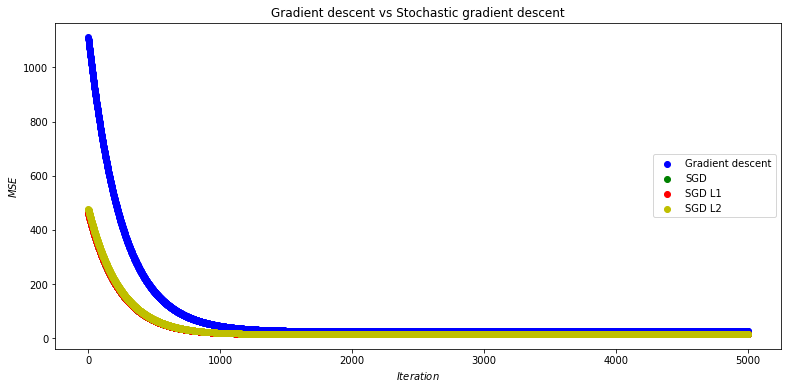

In [87]:
# Визуализируем изменение ошибки, используя Градиентный спуск
plt.figure(figsize=(13, 6))
plt.title('Gradient descent vs Stochastic gradient descent')
plt.xlabel(r'$Iteration$')
plt.ylabel(r'$MSE$')

plt.scatter(errors_gr[:, 0], errors_gr[:, 1], color = 'b', label='Gradient descent')
plt.scatter(errors_sgd[:, 0], errors_sgd[:, 1], color = 'g', label='SGD')
plt.scatter(errors_sgd_L1[:, 0], errors_sgd_L1[:, 1], color = 'r', label='SGD L1')
plt.scatter(errors_sgd_L2[:, 0], errors_sgd_L2[:, 1], color = 'y', label='SGD L2')

plt.legend(loc='center right')

plt.show()


По заданию необходимо сделать вывод о разнице скорости сходимости каждого из методов.<br>
Можно сделать вывод, что обычный градиентный спуск дает самый худший результат - нужно чуть больше 1000 итераций для достижения минимума. Методы, основанные на Стахостическом градиентном спуске очень похожи - нужно менее 1000 итераций, чтобы прийти к минимуму.
Ошибка, которую дают стахостические методы, меньше, чем у обычного градиентного.

Для визуализации разницы в ошибках, расчитанных для моделей с разными параметрами, построю график.

In [102]:
#выбор ошибки на последней итерации для сравнения на графике
e_gr = errors_gr[:,1][-1]
e_sgd = errors_sgd[:,1][-1]
e_sgd_L1 = errors_sgd_L1[:,1][-1]
e_sgd_L2 = errors_sgd_L2[:,1][-1]

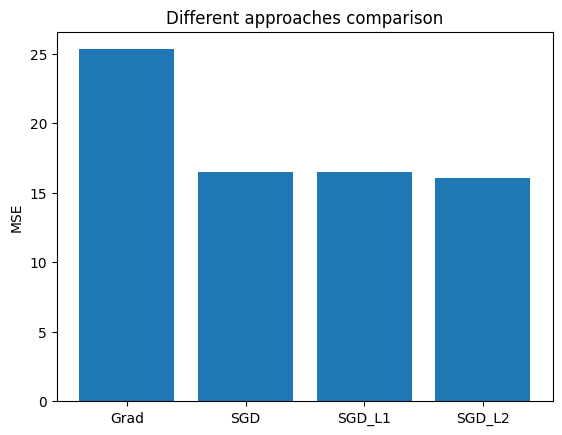

In [107]:
#построим график, чтобы сравнить результаты
objects = ('Grad', 'SGD', 'SGD_L1', 'SGD_L2')
y_pos = np.arange(len(objects))
performance = [e_gr,e_sgd,e_sgd_L1,e_sgd_L2]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('MSE')
plt.title('Different approaches comparison')

plt.show()